# Fraud Detection in Financial Transactions

Fraud detection is an essential part of financial systems, aiming to identify and prevent fraudulent activities within financial transactions. In this project, we will explore how advanced analytics and machine learning techniques can be leveraged to distinguish between legitimate and fraudulent behavior. Key components of fraud detection include:

**Key Concepts and Challenges**:
1. **Anomaly Detection**: Identifying unusual patterns or deviations from normal behavior within data.
2. **Machine Learning Models**: Employing algorithms like Logistic Regression, Decision Trees, or Neural Networks for predictive analysis.
3. **Feature Engineering**: Selecting and transforming relevant features to enhance fraud detection accuracy.
4. **Real-time Monitoring**: Implementing systems that can detect and respond to fraudulent activities in real-time.
5. **Scalability**: Designing fraud detection systems capable of handling large volumes of transactions efficiently.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


## Data Cleaning and Exploration

Before we dive into building models, let's first load, clean and explore the dataset to understand its characteristics.


In [2]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/creditcard.csv'
df=pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Cleaning data
## Check for missing values
print('Missing Values: ')
print(df.isnull().sum())
# Duplicates
print(f'Number of duplicate rows: {df.duplicated().sum()}')
#Remove duplicates
df.drop_duplicates(inplace=True)
# Data types
print("\nDataset Infomation:")
print(df.info())

Missing Values: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Duplicates:
Number of duplicate rows: 1081

Dataset Infomation:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9  

### Confirm that duplicates were properly removed

In [7]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


### Anomaly Detection to find any outliers using boxplots and IQR

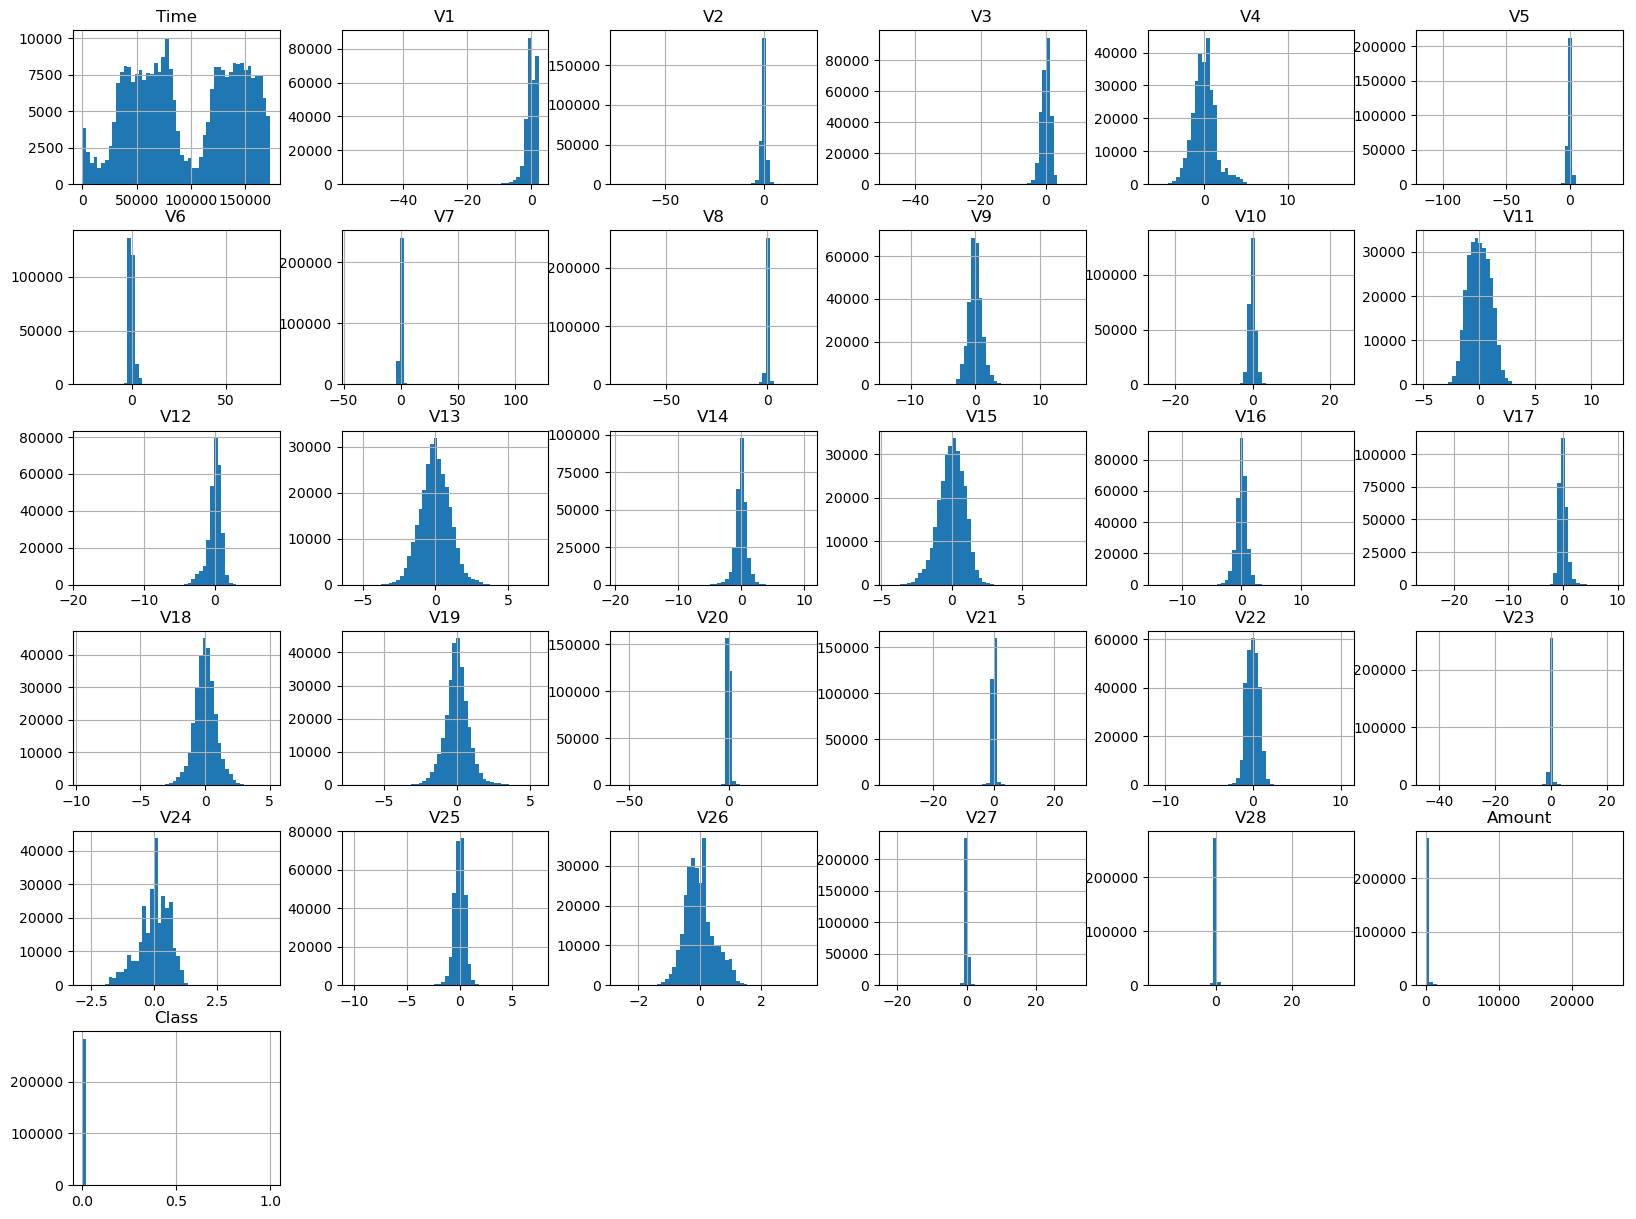

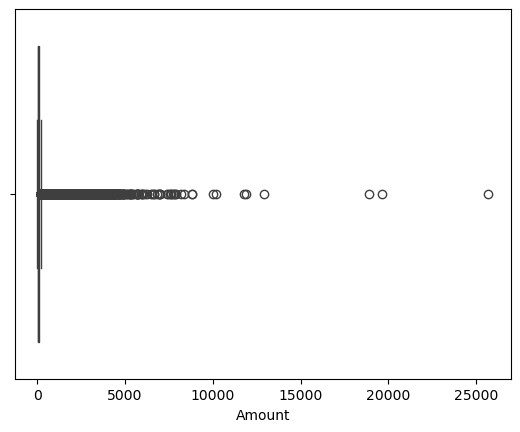

In [13]:
# Plot histograms for all numeric features
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Boxplot to identify outliers in continuous features like 'Amount'
sns.boxplot(x=df['Amount'])
plt.show()


In [10]:
# Calculate IQR for 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect anomalies based on the IQR method
anomalies_iqr = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of anomalies detected using IQR: {len(anomalies_iqr)}")


Number of anomalies detected using IQR: 31685


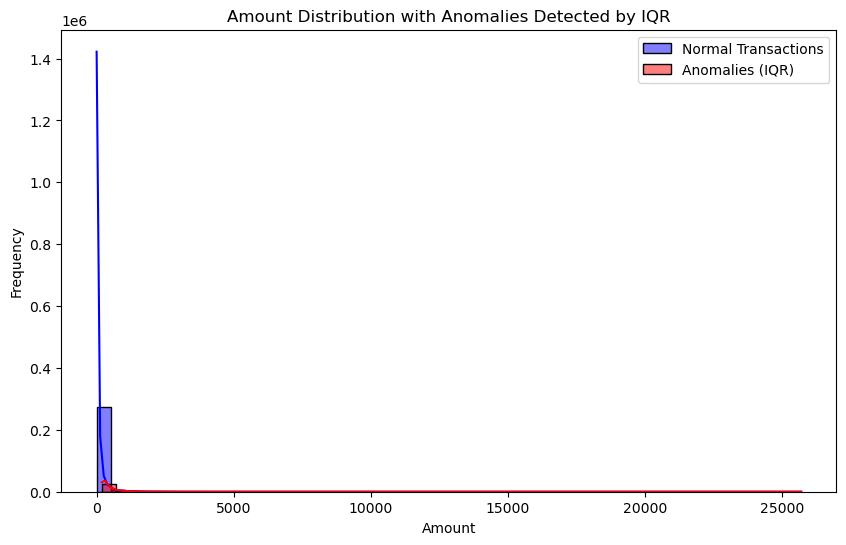

In [21]:
# Visualize anomalies detected by IQR
plt.figure(figsize=(10, 6))

# Plot histogram for all 'Amount' values
sns.histplot(df['Amount'], bins=50, color='blue', kde=True, label='Normal Transactions')

# Plot anomalies detected using IQR
sns.histplot(anomalies_iqr['Amount'], bins=50, color='red', kde=True, label='Anomalies (IQR)')

plt.legend()
plt.title('Amount Distribution with Anomalies Detected by IQR')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


## Feature Engineering

Before training the model, it is essential to scale the 'Amount' feature to ensure that the model performs optimally, as features with large numerical ranges could bias the algorithm.

We will scale the 'Amount' column using **StandardScaler**.


In [23]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Splitting the dataset into features and target variable
X = df.drop(columns=['Class'])  # Features (everything except 'Class')
y = df['Class']  # Target variable (fraud or not)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (226980, 30)
Testing data shape: (56746, 30)


## Model Training

In this section, we will train three different machine learning models to detect fraudulent transactions: **Logistic Regression**, **Decision Tree**, and **Random Forest**.

In [24]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


C:\Users\ADMIN\.conda\envs\creatingPythonEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation and Results

We will now evaluate the performance of each model using classification metrics such as the **classification report**, **confusion matrix**, and **ROC-AUC score**. Since the dataset is imbalanced, the **AUPRC** is a more reliable metric than accuracy.




In [26]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_logreg)}\n")

# Evaluate Decision Tree
print("Decision Tree Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_dt)}\n")

# Evaluate Random Forest
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_rf)}\n")


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.58      0.69        90

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746

[[56647     9]
 [   38    52]]
ROC-AUC Score: 0.7888094621732719

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746

[[56624    32]
 [   26    64]]
ROC-AUC Score: 0.8552731494555839

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.

## Conclusions and Recommendations

Based on the evaluation results, **Random Forest** outperforms the other models, with the highest ROC-AUC score (0.8666) and good recall (0.73) and f1-score (0.84) for detecting fraudulent transactions. **Logistic Regression** and **Decision Tree** also perform well, but with lower recall for fraudulent transactions.

Given the class imbalance, we recommend using **SMOTE** to improve fraud detection. 

### Potential improvements:
- Explore models like **Neural Networks** or **XGBoost** for better performance.
- Implement **real-time monitoring** for detecting fraud in ongoing transactions.
- Further **feature engineering** could enhance model accuracy.
